# WeatherPy




In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
output_data_file = pd.read_csv("../output_data/cities.csv")
output_data_file

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,0,tuktoyaktuk,90,CA,1595985103,93,48.20,69.45,-133.04,10.29
1,1,quatre cocos,20,MU,1595985488,83,69.80,-20.21,57.76,4.70
2,2,port pirie,0,AU,1595985488,48,60.80,-33.18,138.02,9.17
3,3,rafraf,20,TN,1595985488,53,73.40,37.19,10.18,3.36
4,4,cockburn town,14,TC,1595985488,81,83.28,21.46,-71.14,19.77
...,...,...,...,...,...,...,...,...,...,...
561,561,beringovskiy,20,RU,1595985134,59,62.33,63.05,179.32,9.93
562,562,san quintin,1,MX,1595985162,74,69.75,30.48,-115.95,16.98
563,563,padilla,40,CO,1595985523,69,75.20,3.22,-76.31,5.82
564,564,te anau,100,NZ,1595985523,83,49.26,-45.42,167.72,1.45


## Generate Cities List

In [7]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [8]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1552e63a9c97f14feea359d3e9866f97'

In [9]:

# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        

Processing record 1 of Set 1 | provideniya
Processing record 2 of Set 1 | hobart
Processing record 3 of Set 1 | ponta do sol
Processing record 4 of Set 1 | kapaa
Processing record 5 of Set 1 | port alfred
Processing record 6 of Set 1 | vila franca do campo
Processing record 7 of Set 1 | rikitea
Processing record 8 of Set 1 | busselton
Processing record 9 of Set 1 | ushuaia
Processing record 10 of Set 1 | olafsvik
Processing record 11 of Set 1 | bredasdorp
Processing record 12 of Set 1 | baft
Processing record 13 of Set 1 | husavik
Processing record 14 of Set 1 | santa rosa
Processing record 15 of Set 1 | vaini
Processing record 16 of Set 1 | la ronge
Processing record 17 of Set 1 | tuktoyaktuk
Processing record 18 of Set 1 | bedesa
Record not found
Processing record 19 of Set 1 | saint-philippe
Processing record 20 of Set 1 | saldanha
Processing record 21 of Set 1 | cangucu
Processing record 22 of Set 1 | maceio
Processing record 23 of Set 1 | dikson
Processing record 24 of Set 1 | sun

Processing record 193 of Set 1 | juybar
Processing record 194 of Set 1 | novokayakent
Processing record 195 of Set 1 | touros
Processing record 196 of Set 1 | kenora
Processing record 197 of Set 1 | manbij
Processing record 198 of Set 1 | new norfolk
Processing record 199 of Set 1 | ostersund
Processing record 200 of Set 1 | zhezkazgan
Processing record 201 of Set 1 | kwinana
Processing record 202 of Set 1 | vaitape
Processing record 203 of Set 1 | fairbanks
Processing record 204 of Set 1 | qaqortoq
Processing record 205 of Set 1 | airai
Processing record 206 of Set 1 | ipixuna
Processing record 207 of Set 1 | awbari
Record not found
Record not found
Record not found
Processing record 208 of Set 1 | ketchikan
Processing record 209 of Set 1 | usak
Processing record 210 of Set 1 | pinerolo
Processing record 211 of Set 1 | torbay
Processing record 212 of Set 1 | hirado
Processing record 213 of Set 1 | benavente
Processing record 214 of Set 1 | souillac
Processing record 215 of Set 1 | for

Processing record 383 of Set 1 | burnie
Processing record 384 of Set 1 | weyburn
Record not found
Processing record 385 of Set 1 | denpasar
Processing record 386 of Set 1 | pascagoula
Processing record 387 of Set 1 | moerai
Processing record 388 of Set 1 | payo
Processing record 389 of Set 1 | high level
Processing record 390 of Set 1 | gewane
Processing record 391 of Set 1 | tautira
Processing record 392 of Set 1 | hornepayne
Processing record 393 of Set 1 | ponta delgada
Processing record 394 of Set 1 | along
Processing record 395 of Set 1 | digha
Processing record 396 of Set 1 | san andres
Processing record 397 of Set 1 | monteagudo
Processing record 398 of Set 1 | kargasok
Processing record 399 of Set 1 | sretensk
Processing record 400 of Set 1 | huntsville
Processing record 401 of Set 1 | mwanza
Processing record 402 of Set 1 | troitsko-pechorsk
Processing record 403 of Set 1 | norre alslev
Processing record 404 of Set 1 | guatire
Processing record 405 of Set 1 | te anau
Processin

Processing record 571 of Set 1 | muros
Processing record 572 of Set 1 | nagato
Processing record 573 of Set 1 | bindi
Processing record 574 of Set 1 | mugla
Processing record 575 of Set 1 | eyl
Processing record 576 of Set 1 | ewo
Processing record 577 of Set 1 | ancud
Processing record 578 of Set 1 | port-gentil
Processing record 579 of Set 1 | bilma
Processing record 580 of Set 1 | oktyabrskiy
Processing record 581 of Set 1 | caravelas
Processing record 582 of Set 1 | wattegama
Processing record 583 of Set 1 | lashio
Processing record 584 of Set 1 | srandakan
Processing record 585 of Set 1 | nishihara


In [10]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)


In [11]:
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,50.11,59,19,10.56,RU,1596337200
1,Hobart,-42.8794,147.3294,53.87,50,87,10.11,AU,1596337200
2,Ponta do Sol,32.6667,-17.1000,71.02,57,2,6.24,PT,1596337200
3,Kapaa,22.0752,-159.3190,79.57,68,11,11.30,US,1596337200
4,Port Alfred,-33.5906,26.8910,58.17,69,0,9.10,ZA,1596337200


In [12]:
weather_dict = {
    "City": cityname,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": max_temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Temp          585
Lat           585
Lng           585
Wind Speed    585
dtype: int64

In [13]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,Provideniya,19,RU,1596337200,59,50.11,64.3833,-173.3000,10.56
1,Hobart,87,AU,1596337200,50,53.87,-42.8794,147.3294,10.11
2,Ponta do Sol,2,PT,1596337200,57,71.02,32.6667,-17.1000,6.24
3,Kapaa,11,US,1596337200,68,79.57,22.0752,-159.3190,11.30
4,Port Alfred,0,ZA,1596337200,69,58.17,-33.5906,26.8910,9.10


In [14]:
# output data to csv
weather_data.to_csv("../output_data/new_city_weather.csv")

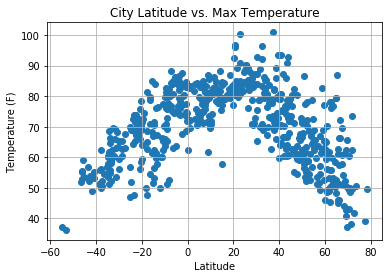

In [15]:
#Plot latitude vs temperature
plt.scatter(weather_data['Lat'], weather_data['Temp'])
plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('../Images/lat vs temp.png', bbox_inches='tight')

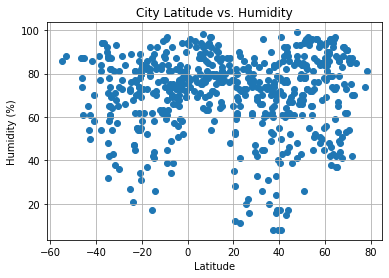

In [16]:
#Plot latitude vs humidity and save as .png
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../Images/lat vs humid.png', bbox_inches='tight')

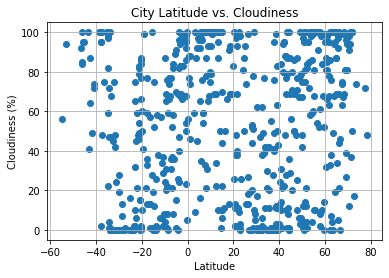

In [17]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../Images/lat vs cloud.png', bbox_inches='tight')

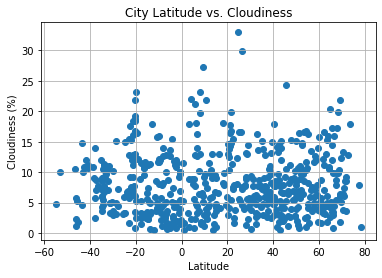

In [18]:
#Plot latitude vs Wind speed and save as .png
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../Images/lat vs windspeed.png', bbox_inches='tight')

In [19]:
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [20]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.68


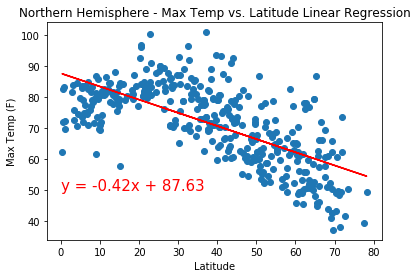

In [21]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

equation = linear_agression(northern_hemisphere["Lat"],northern_hemisphere["Temp"])
annotate(equation, 0, 50)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set x and y label
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude.png")

The r-squared is : 0.73


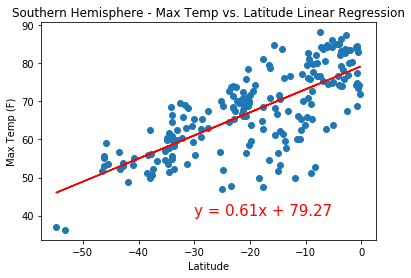

In [22]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Temp"])
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set x and y label
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude.png")


The r-squared is : -0.05


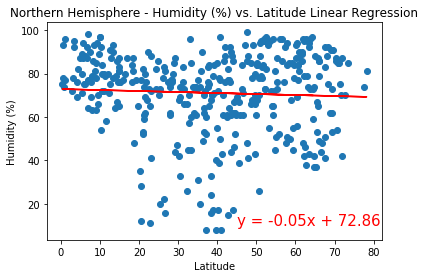

In [23]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 45, 10)
#Set title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#Set x and y label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude.png")

The r-squared is : 0.01


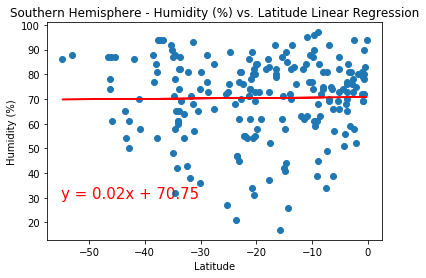

In [24]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -55, 30)
#set Title 
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
#Set x and y label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/Southern Hemisphere - Humidity vs. Latitude.png")

The r-squared is : 0.01


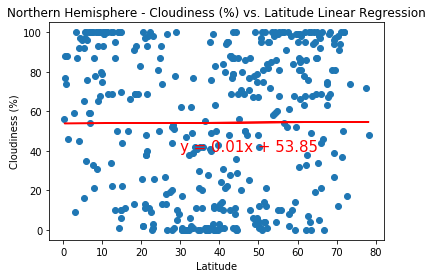

In [25]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set x and y labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude.png")

The r-squared is : 0.0


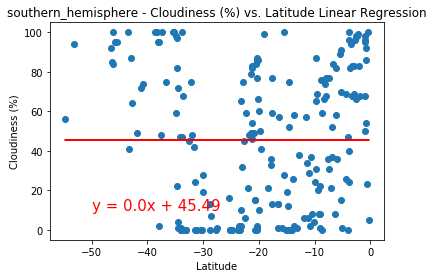

In [26]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation,-50, 10)

# Set a title
plt.title("southern_hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set x and y labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude.png")

The r-squared is : -0.02


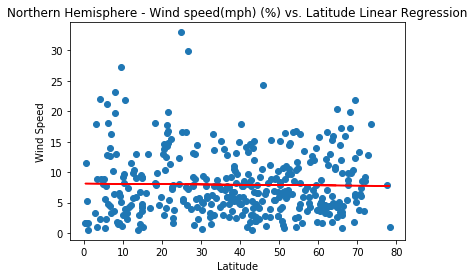

In [27]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 35)

# Set a title
plt.title("Northern Hemisphere - Wind speed(mph) (%) vs. Latitude Linear Regression")

# Set x and y labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../Images/Northern Hemisphere - Wind speed vs. Latitude.png")

The r-squared is : -0.13


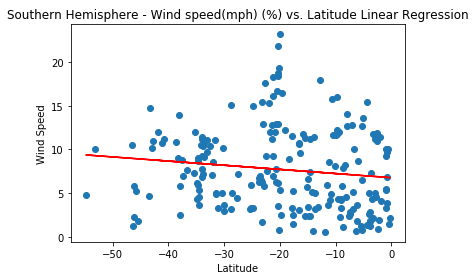

In [28]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
annotate(equation, -25, 25)
# Set a title
plt.title("Southern Hemisphere - Wind speed(mph) (%) vs. Latitude Linear Regression")

# Set x and y labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


plt.savefig("../Images/Southern Hemisphere - Wind speed vs. Latitude.png")